In [128]:
import networkx as nx
import numpy as np
import random
import itertools
import collections

seed = 1005
np.random.seed(seed)
random.seed(seed)

In [48]:
from networkx.generators import random_graphs, community
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as snpowerlaw_cluster_grapheds = cm.get_cmap('Reds')
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Exercise five

### The classroom

We first generate a random classroom of $n$ individuals based on the Barabási–Albert model.

In [130]:
class SocialNetwork:
    def __init__(self, G):
        
        self.G =  G
        self.layout = nx.spring_layout(self.G)
        
    @property
    def eigen(self):
        return list(nx.eigenvector_centrality(self.G).values())
    
    @property
    def utility(self):
        return sum(degree for node, degree in self.G.degree)
    
    @property
    def partition(self):
        return kernighan_lin_bisection(self.G)
    
        
    def draw(self, ax, eigen_color=True, **kwargs):
        
        color_args = {
            "vmin": min(c.eigen) / 3,
            "vmax": max(c.eigen),
            "node_color": self.eigen,
            "cmap": reds
        } if eigen_color else { "node_color": "red" }

            
        nx.draw(
            self.G, self.layout,
            ax = ax,
            **color_args,
            **kwargs)
        
        return ax
    
    def draw_subgraphs(self, A, B, ax):
        
        AG = self.G.subgraph(A)
        BG = self.G.subgraph(B)
        
        nx.draw(AG, self.layout, node_color="r", ax = ax)
        nx.draw(BG, self.layout, node_color="b", ax = ax)
        
        return ax
    
    def draw_degree(self, ax):
        
        degrees = sorted([d for n, d in self.G.degree()], reverse=True)
        degree_count = collections.Counter(degrees)
        
        deg, cnt = zip(*degree_count.items())
        
        ax.bar(deg, cnt)
        ax.set_xlabel("Degrees")
        ax.set_ylabel("Count")
        
        ax.set_xticks([d + 0.4 for d in deg])
        ax.set_xticklabels(deg)
        
        return ax

In [89]:
c = SocialNetwork(
    random_graphs.extended_barabasi_albert_graph(30, 2, 0.2, 0.5)
)

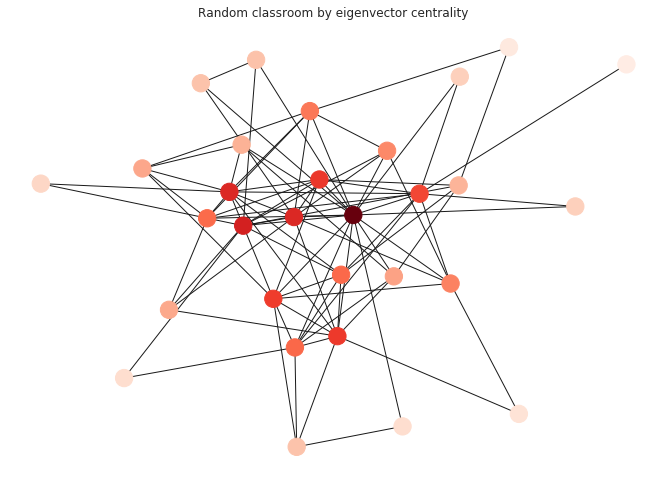

In [90]:
fig, ax = plt.subplots()
c.draw(ax)
ax.set_title("Random classroom by eigenvector centrality")
fig.show()

### Partition

We want to find the partition that minimizes the number of edges between classes. 

In [91]:
A, B = c.partition

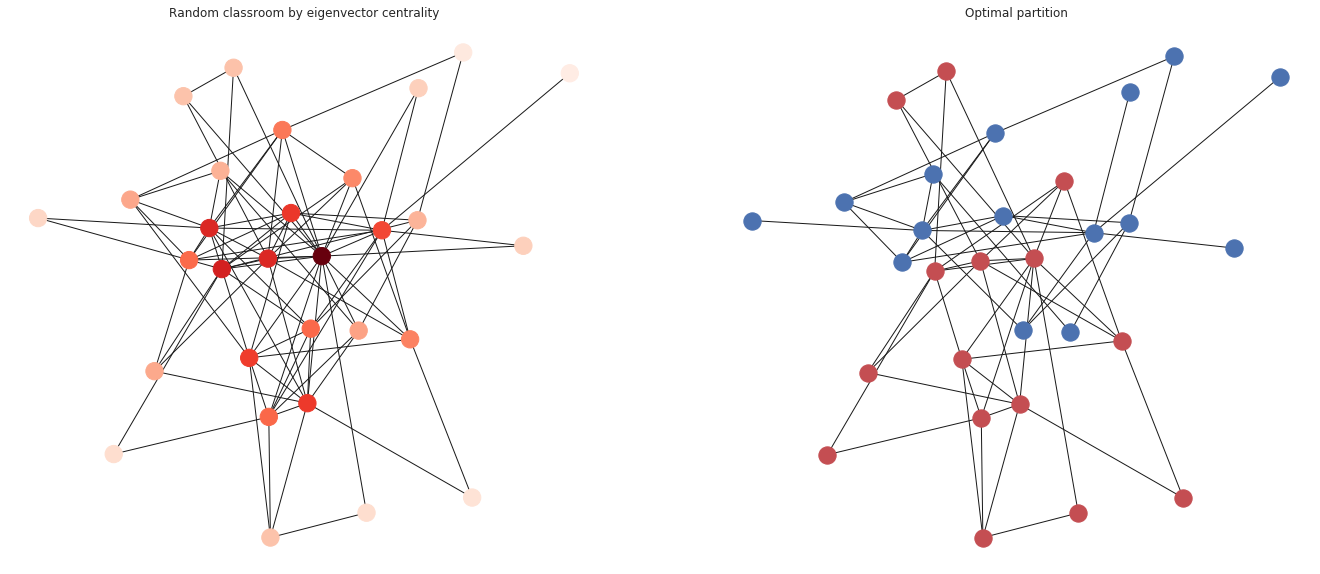

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11.7 * 2, 10))


c.draw(ax1)
c.draw_subgraphs(A, B, ax2)

ax1.set_title("Random classroom by eigenvector centrality")
ax2.set_title("Optimal partition")
fig.savefig("plots/classroom.png")
fig.show()

### A smaller class

In [93]:
c = SocialNetwork(
    random_graphs.extended_barabasi_albert_graph(4, 1, 0.2, 0.5)
)

A, B = c.partition

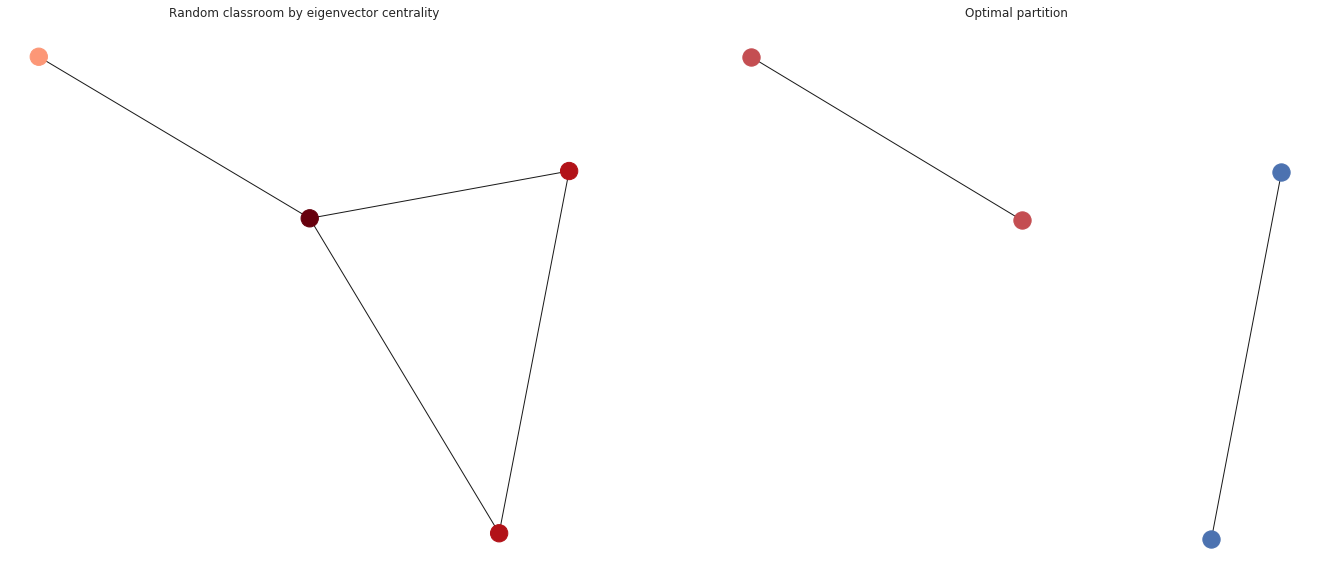

In [94]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (11.7 * 2, 10))


c.draw(ax1)
c.draw_subgraphs(A, B, ax2)

ax1.set_title("Random classroom by eigenvector centrality")
ax2.set_title("Optimal partition")

fig.show()

## Exercise six

In [101]:
groups = [random.randint(5, 10) for _ in range(10)]

In [132]:
office = SocialNetwork(
    community.random_partition_graph(groups, .5, .01)
)

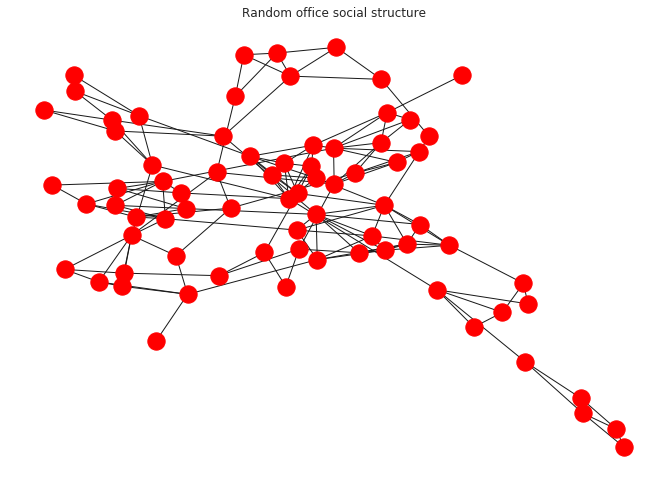

In [133]:
fig, ax = plt.subplots()
office.draw(ax, eigen_color=False)
ax.set_title("Random office social structure")
fig.show()

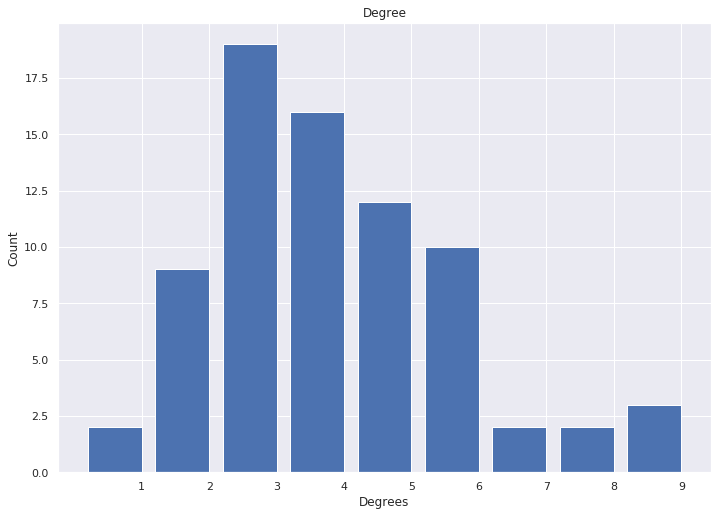

In [134]:
fig, ax = plt.subplots()
office.draw_degree(ax)
ax.set_title("Degree")
fig.show()